<a href="https://colab.research.google.com/github/salonijaitly/ML_Sem_V/blob/master/ML_07_J070_290820/ML_07_J070_290820.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_covtype, fetch_kddcup99, load_breast_cancer, load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt

In [ ]:
from keras import models
from keras import layers
from keras.utils import to_categorical

#1. Forest Cover Type Dataset

In [ ]:
forest_cov = fetch_covtype()

In [ ]:
x_forcov = forest_cov.data
y_forcov = forest_cov.target

In [ ]:
x_for = pd.DataFrame(x_forcov)
y_for = pd.DataFrame(y_forcov)
print(x_for.shape)
print(y_for.shape)

(581012, 54)
(581012, 1)


In [ ]:
x_for.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
46    float64
47    float64
48    float64
49    float64
50    float64
51    float64
52    float64
53    float64
dtype: object

In [ ]:
y_for.dtypes

0    int32
dtype: object

In [ ]:
x_for.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
dtype: int64

In [ ]:
y_for.isnull().sum()

0    0
dtype: int64

In [ ]:
corr = x_for.corr()
corr

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53
0,1.000000,0.015735,-0.242697,0.306229,0.093306,0.365559,0.112179,0.205887,0.059148,0.148022,0.131838,0.238164,0.066550,-0.619374,-0.204512,-0.187677,-0.182463,-0.183521,-0.150376,-0.214606,-0.002252,-0.003021,-0.060915,-0.428746,-0.134227,-0.118905,-0.043984,-0.080825,-0.007153,-0.059446,-0.111028,-0.081811,0.033144,-0.043128,0.017557,0.158959,0.124356,0.053582,0.028753,-0.016657,0.035254,-0.029270,0.074327,-0.026667,0.070405,0.167077,0.070633,0.011731,0.083005,0.021107,0.035433,0.217179,0.193595,0.212612
1,0.015735,1.000000,0.078728,0.017376,0.070305,0.025121,-0.579273,0.336103,0.646944,-0.109172,-0.140123,0.055988,0.074904,0.082687,-0.007574,-0.005649,-0.002730,0.017212,0.008938,0.010766,-0.005052,-0.003366,-0.020800,0.049835,-0.064344,-0.070209,0.054544,0.007597,-0.002660,0.007846,-0.000168,-0.028353,-0.003635,-0.029440,0.032998,0.021578,0.013676,0.018164,-0.003265,-0.010661,0.011328,0.027535,-0.062181,-0.028922,0.001763,0.056233,0.019163,0.010861,-0.021991,0.002281,-0.020398,0.017706,0.008294,-0.005866
2,-0.242697,0.078728,1.000000,-0.010607,0.274976,-0.215914,-0.327199,-0.526911,-0.175854,-0.185662,-0.234576,-0.036253,0.125663,0.255503,0.107847,-0.018553,0.125497,0.131847,0.072311,0.003673,-0.015661,-0.023359,-0.032752,0.244037,-0.050894,-0.169300,0.192423,0.000228,0.001081,-0.034791,-0.040208,-0.045851,-0.083743,-0.077582,-0.025461,-0.053396,-0.207397,0.082434,0.026364,-0.021449,0.043695,0.067052,-0.082941,0.075864,-0.034610,-0.133504,0.208942,-0.011002,-0.022228,0.002918,0.007848,-0.072208,0.093602,0.025637
3,0.306229,0.017376,-0.010607,1.000000,0.606236,0.072030,-0.027088,0.046790,0.052330,0.051874,-0.097124,0.055726,0.122028,-0.100433,-0.035096,-0.011569,-0.041211,-0.049071,-0.009370,-0.012916,0.004751,-0.000795,-0.021935,-0.071653,0.001399,0.014628,-0.002032,-0.038478,-0.002667,-0.067448,-0.071435,-0.013340,-0.043236,-0.078088,-0.039953,-0.051424,-0.132244,0.021927,0.016099,0.013408,0.052384,0.026210,-0.001025,-0.049960,0.073658,0.127217,0.101195,0.070268,-0.005231,0.033421,-0.006802,0.043031,0.031922,0.147020
4,0.093306,0.070305,0.274976,0.606236,1.000000,-0.046372,-0.166333,-0.110957,0.034902,-0.069913,-0.180710,-0.008709,0.146839,0.077792,0.015275,0.008954,0.008863,0.025066,0.026772,0.046259,-0.008485,-0.012915,-0.028476,0.055154,-0.020870,-0.044526,0.083482,-0.024281,-0.001744,-0.050909,-0.054191,-0.031692,-0.055635,-0.076727,-0.026116,-0.075679,-0.180098,0.037066,-0.013471,-0.011212,0.067086,0.071672,-0.075860,-0.011901,0.033609,0.039762,0.167091,0.060274,-0.006092,0.012955,-0.007520,-0.008629,0.043859,0.179006
5,0.365559,0.025121,-0.215914,0.072030,-0.046372,1.000000,0.034349,0.189461,0.106119,0.331580,0.453913,-0.200411,-0.232933,-0.270349,-0.083585,-0.088026,-0.084988,-0.088524,-0.061607,-0.108328,0.020107,0.025805,-0.045813,-0.182955,-0.099293,0.054196,-0.054968,-0.033945,-0.003144,0.018083,-0.051825,-0.051243,0.068758,0.056595,-0.014890,0.046979,-0.007067,-0.032451,-0.034842,0.002521,0.003866,-0.032749,0.306324,0.077091,-0.058840,-0.089019,-0.082779,0.006390,-0.003000,0.007550,0.016313,0.079778,0.033762,0.016052
6,0.112179,-0.579273,-0.327199,-0.027088,-0.166333,0.034349,1.000000,0.010037,-0.780296,0.132669,0.201299,-0.006181,-0.100565,-0.200282,-0.000937,0.036253,0.039648,0.023812,-0.046514,-0.005665,0.003571,0.005000,0.021741,-0.223782,0.048371,0.092364,-0.073390,-0.010719,-0.000522,-0.006590,0.004700,0.031293,0.017103,0.024811,-0.014162,0.000252,0.036234,-0.112379,0.032783,0.027388,0.001638,-0.091435,0.081499,0.104003,-0.035114,0.006494,-0.064381,0.007154,0.027870,0.007865,0.010332,0.015108,-0.029620,-0.000016
7,0.205887,0.336103,-0.526911,0.046790,-0.110957,0.189461,0.010037,1.000000,0.594274,0.057329,0.028728,0.042392,0.048646,-0.195733,-0.052561,0.043250,0.002702,0.084397,-0.062044,-0.010497,0.005282,0.009520,0.005446,-0.245854,-0.011993,0.058469,0.0

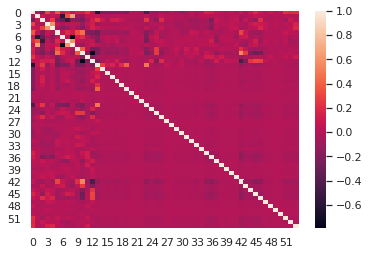

In [ ]:
sns.set()
ax = sns.heatmap(corr)

In [ ]:
y_fore = y_for.replace([1,2,3,4,5,6,7], [0,1,2,3,4,5,6])
y_fore = to_categorical(y_fore)
x_train, x_test, y_train, y_test = train_test_split(x_for, y_fore, test_size = 0.2)
x_dev, x_test, y_dev, y_test = train_test_split(x_test, y_test, test_size = 0.5)
print(x_train.shape)
print(x_dev.shape)
print(x_test.shape)
print(y_train.shape)
print(y_dev.shape)
print(y_test.shape)

(464809, 54)
(58101, 54)
(58102, 54)
(464809, 7)
(58101, 7)
(58102, 7)


In [ ]:
nn_for = models.Sequential()
nn_for.add(layers.Dense(512, activation = 'relu', input_shape = (54, )))
nn_for.add(layers.Dense(256, activation = 'tanh'))
nn_for.add(layers.Dense(128, activation = 'tanh'))
nn_for.add(layers.Dense(54, activation = 'relu'))
nn_for.add(layers.Dense(7, activation = 'softmax'))
nn_for.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
forest_his = nn_for.fit(x_train, y_train, epochs = 100, batch_size = 4000, validation_data = (x_dev, y_dev))
nn_for.evaluate(x_dev, y_dev)

Epoch 1/100
117/117 [==============================] - 12s 104ms/step - loss: 1.1574 - accuracy: 0.4883 - val_loss: 1.1120 - val_accuracy: 0.4912
Epoch 2/100
117/117 [==============================] - 12s 100ms/step - loss: 1.0990 - accuracy: 0.5008 - val_loss: 1.0783 - val_accuracy: 0.5028
Epoch 3/100
117/117 [==============================] - 12s 100ms/step - loss: 1.0673 - accuracy: 0.5105 - val_loss: 1.0389 - val_accuracy: 0.5385
Epoch 4/100
117/117 [==============================] - 12s 100ms/step - loss: 1.0295 - accuracy: 0.5218 - val_loss: 0.9583 - val_accuracy: 0.5630
Epoch 5/100
117/117 [==============================] - 12s 101ms/step - loss: 1.0020 - accuracy: 0.5364 - val_loss: 0.9689 - val_accuracy: 0.5460
Epoch 6/100
117/117 [==============================] - 12s 101ms/step - loss: 0.9766 - accuracy: 0.5574 - val_loss: 0.9236 - val_accuracy: 0.5689
Epoch 7/100
117/117 [==============================] - 12s 100ms/step - loss: 0.9512 - accuracy: 0.5702 - val_loss: 0.9524 -

[0.47198009490966797, 0.7977487444877625]

In [ ]:
dev_acc = nn_for.evaluate(x_dev, y_dev)[1]
print('The dev accuracy is',dev_acc)

1816/1816 [==============================] - 2s 1ms/step - loss: 0.4720 - accuracy: 0.7977
The dev accuracy is 0.7977487444877625


In [ ]:
test_acc = nn_for.evaluate(x_test, y_test)[1]
print('The test accuracy is',test_acc)

1816/1816 [==============================] - 2s 1ms/step - loss: 0.4578 - accuracy: 0.8056
The test accuracy is 0.8056176900863647


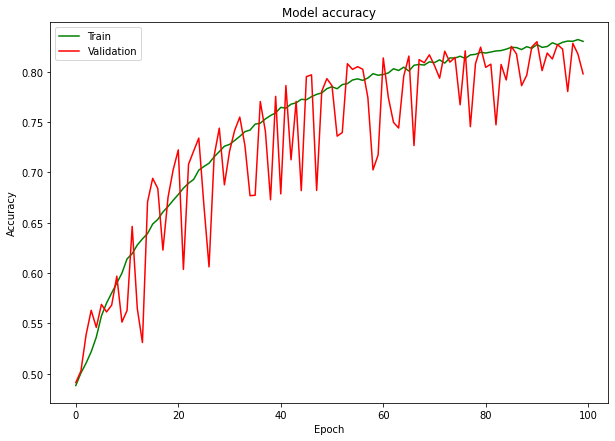

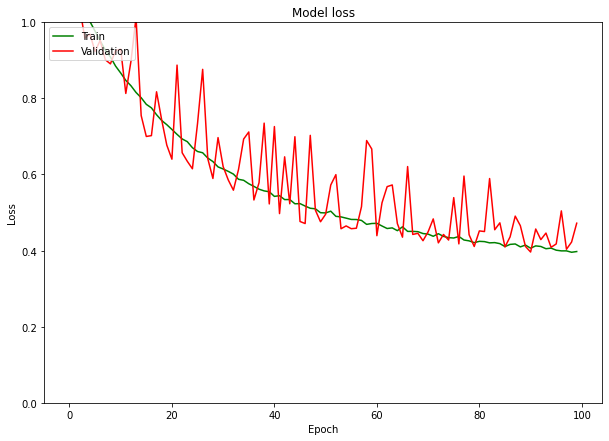

In [ ]:
plt.figure(figsize = (10,7))
plt.plot(forest_his.history['accuracy'], color = 'green')
plt.plot(forest_his.history['val_accuracy'], color = 'red')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize = (10,7))
plt.plot(forest_his.history['loss'], color = 'green')
plt.plot(forest_his.history['val_loss'], color = 'red')
plt.ylim((0,1))
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#2. KDD 1999 Cup Dataset 

In [ ]:
kdd_99 = fetch_kddcup99()

In [ ]:
x_kdd99 = kdd_99.data
y_kdd99 = kdd_99.target

In [ ]:
x_kdd_cup99 = pd.DataFrame(x_kdd99)
y_kdd_cup99 = pd.DataFrame(y_kdd99)
print(x_kdd_cup99.shape)
print(y_kdd_cup99.shape)

(494021, 41)
(494021, 1)


In [ ]:
print(x_kdd_cup99.dtypes)
print(y_kdd_cup99.dtypes)

0     object
1     object
2     object
3     object
4     object
5     object
6     object
7     object
8     object
9     object
10    object
11    object
12    object
13    object
14    object
15    object
16    object
17    object
18    object
19    object
20    object
21    object
22    object
23    object
24    object
25    object
26    object
27    object
28    object
29    object
30    object
31    object
32    object
33    object
34    object
35    object
36    object
37    object
38    object
39    object
40    object
dtype: object
0    object
dtype: object


In [ ]:
le = LabelEncoder()
for i in [1,2,3]:
  x_kdd_cup99[i] = [j.decode('utf-8') for j in x_kdd_cup99[i]]
  x_kdd_cup99[i] = le.fit_transform(x_kdd_cup99[i])

for i in range(x_kdd_cup99.shape[1]):
  x_kdd_cup99[i] = x_kdd_cup99[i].astype('float')

In [ ]:
y_kdd99 = [i.decode('utf-8') for i in y_kdd99]
y_kdd99 = pd.DataFrame(le.fit_transform(y_kdd99))

In [ ]:
y_kdd_cup99 = to_categorical(y_kdd99)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_kdd_cup99, y_kdd_cup99, test_size = 0.2)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size = 0.5)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(395216, 41)
(49402, 41)
(49403, 41)
(395216, 23)
(49402, 23)
(49403, 23)


In [ ]:
nn_kdd99 = models.Sequential()
nn_kdd99.add(layers.Dense(256, activation = 'relu', input_shape = (41, )))
nn_kdd99.add(layers.Dense(128, activation = 'relu'))
nn_kdd99.add(layers.Dense(64, activation = 'relu'))
nn_kdd99.add(layers.Dense(32, activation = 'relu'))
nn_kdd99.add(layers.Dense(23, activation = 'softmax'))
nn_kdd99.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
kdd99_hist = nn_kdd99.fit(x_train, y_train, epochs = 5, batch_size = 1500, validation_data = (x_val, y_val))

Epoch 1/5
264/264 [==============================] - 4s 17ms/step - loss: 138.2508 - accuracy: 0.9481 - val_loss: 1.5728 - val_accuracy: 0.9860
Epoch 2/5
264/264 [==============================] - 4s 16ms/step - loss: 154.4322 - accuracy: 0.9731 - val_loss: 1.2796 - val_accuracy: 0.9881
Epoch 3/5
264/264 [==============================] - 4s 16ms/step - loss: 128.2408 - accuracy: 0.9830 - val_loss: 1.3407 - val_accuracy: 0.9910
Epoch 4/5
264/264 [==============================] - 4s 16ms/step - loss: 18.6711 - accuracy: 0.9852 - val_loss: 0.0655 - val_accuracy: 0.9898
Epoch 5/5
264/264 [==============================] - 4s 16ms/step - loss: 0.3647 - accuracy: 0.9890 - val_loss: 0.1764 - val_accuracy: 0.9811


In [ ]:
val_acc_kdd = nn_kdd99.evaluate(x_val, y_val)[1]
print('The Validation accuracy is',val_acc_kdd)

1544/1544 [==============================] - 2s 1ms/step - loss: 0.1764 - accuracy: 0.9811
The Validation accuracy is 0.9811141490936279


In [ ]:
test_acc_kdd = nn_kdd99.evaluate(x_test, y_test)[1]
print('The Test accuracy is', test_acc_kdd)

1544/1544 [==============================] - 2s 1ms/step - loss: 0.1703 - accuracy: 0.9834
The Test accuracy is 0.9833613634109497


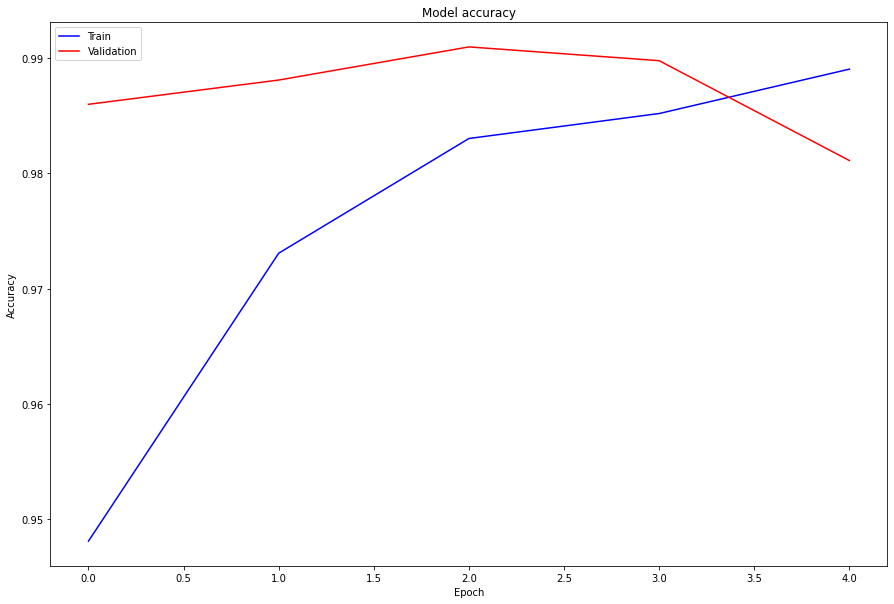

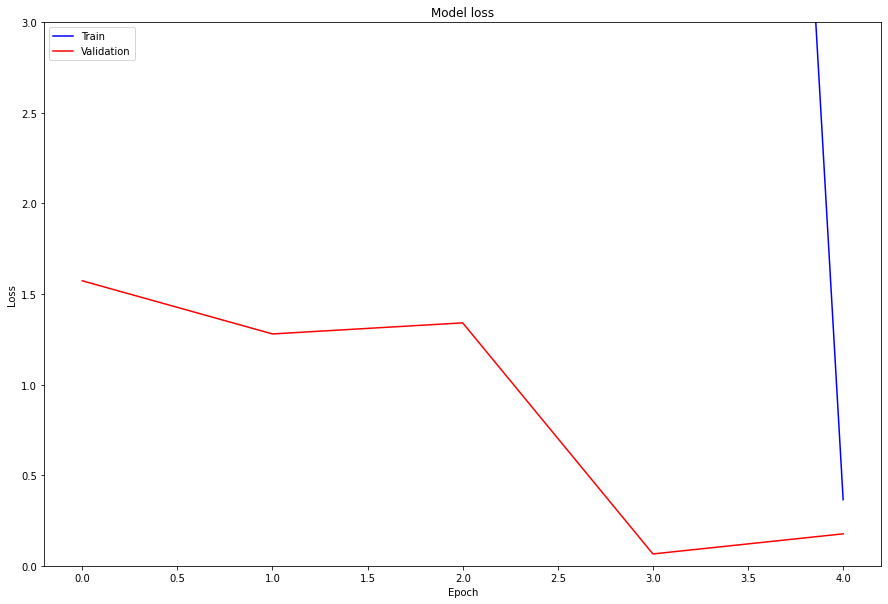

In [ ]:
plt.figure(figsize = (15,10))
plt.plot(kdd99_hist.history['accuracy'], color = 'blue')
plt.plot(kdd99_hist.history['val_accuracy'], color = 'red')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize = (15,10))
plt.plot(kdd99_hist.history['loss'], color = 'blue')
plt.plot(kdd99_hist.history['val_loss'], color = 'red')
plt.ylim((0,3))
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#3. Breast Cancer Dataset

In [ ]:
cancer = load_breast_cancer()

In [ ]:
x_breast_cancer = cancer.data
y_breast_cancer = cancer.target

In [ ]:
x_can = pd.DataFrame(x_breast_cancer)
y_can = pd.DataFrame(y_breast_cancer)
print(x_can.shape)
print(y_can.shape)

(569, 30)
(569, 1)


In [ ]:
print(x_can.dtypes)
print(y_can.dtypes)

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
dtype: object
0    int64
dtype: object


In [ ]:
print(x_can.isnull().sum())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
dtype: int64


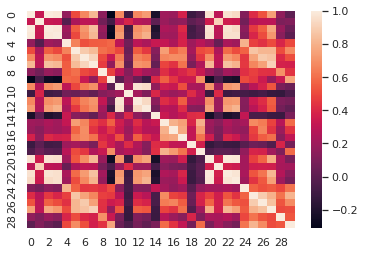

In [ ]:
corr = x_can.corr()
sns.set()
ax = sns.heatmap(corr)

In [ ]:
scaler = StandardScaler()
x_can = pd.DataFrame(scaler.fit_transform(x_can))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_can, y_can, test_size = 0.2)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size = 0.5)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(455, 30)
(57, 30)
(57, 30)
(455, 1)
(57, 1)
(57, 1)


In [ ]:
nn_cancer = models.Sequential()
nn_cancer.add(layers.Dense(256, activation = 'relu', input_shape = (30, )))
nn_cancer.add(layers.Dense(125, activation = 'relu'))
nn_cancer.add(layers.Dense(1, activation = 'sigmoid'))
nn_cancer.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
can_hist = nn_cancer.fit(x_train, y_train, epochs=15,batch_size=10, validation_data = (x_val, y_val))

Epoch 1/15
46/46 [==============================] - 0s 5ms/step - loss: 0.4676 - accuracy: 0.8725 - val_loss: 0.3500 - val_accuracy: 0.9123
Epoch 2/15
46/46 [==============================] - 0s 1ms/step - loss: 0.2870 - accuracy: 0.9363 - val_loss: 0.2507 - val_accuracy: 0.9123
Epoch 3/15
46/46 [==============================] - 0s 2ms/step - loss: 0.2134 - accuracy: 0.9451 - val_loss: 0.1987 - val_accuracy: 0.9474
Epoch 4/15
46/46 [==============================] - 0s 2ms/step - loss: 0.1746 - accuracy: 0.9516 - val_loss: 0.1679 - val_accuracy: 0.9474
Epoch 5/15
46/46 [==============================] - 0s 2ms/step - loss: 0.1506 - accuracy: 0.9560 - val_loss: 0.1463 - val_accuracy: 0.9474
Epoch 6/15
46/46 [==============================] - 0s 1ms/step - loss: 0.1339 - accuracy: 0.9626 - val_loss: 0.1303 - val_accuracy: 0.9474
Epoch 7/15
46/46 [==============================] - 0s 2ms/step - loss: 0.1216 - accuracy: 0.9626 - val_loss: 0.1183 - val_accuracy: 0.9474
Epoch 8/15
46/46 [==

In [ ]:
val_acc = nn_cancer.evaluate(x_val, y_val)[1]
print('The Validation accuracy is', val_acc)

2/2 [==============================] - 0s 2ms/step - loss: 0.0763 - accuracy: 0.9649
The Validation accuracy is 0.9649122953414917


In [ ]:
test_acc = nn_cancer.evaluate(x_test, y_test)[1]
print('The test accuracy is', test_acc)

2/2 [==============================] - 0s 3ms/step - loss: 0.1065 - accuracy: 0.9649
The test accuracy is 0.9649122953414917


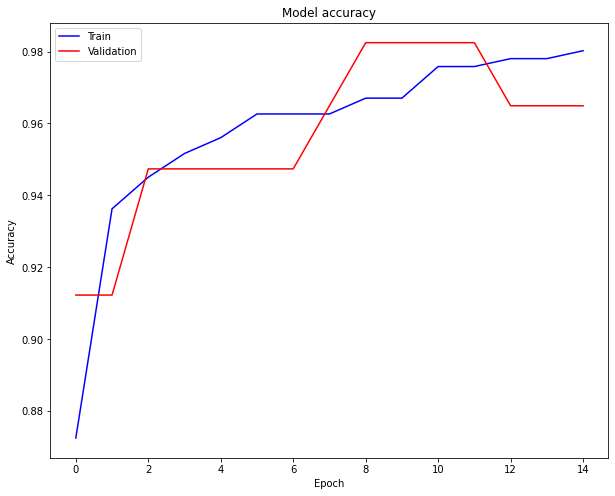

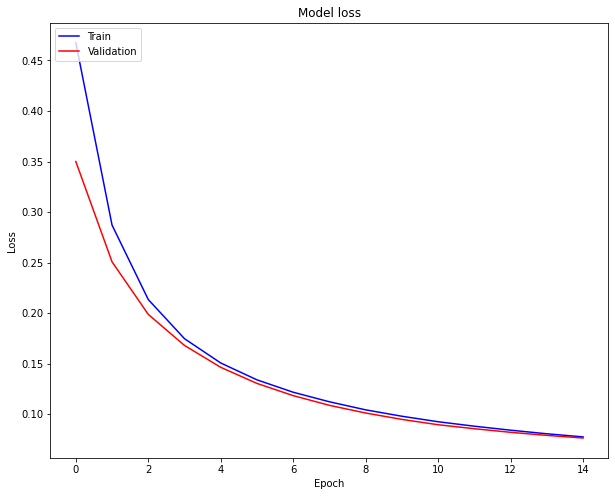

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(can_hist.history['accuracy'], color = 'blue')
plt.plot(can_hist.history['val_accuracy'], color = 'red')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize = (10,8))
plt.plot(can_hist.history['loss'], color = 'blue')
plt.plot(can_hist.history['val_loss'], color = 'red')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#4. Wine Dataset

In [ ]:
wine = load_wine()

In [ ]:
x_wine = wine.data
y_wine = wine.target

In [ ]:
x_wine = pd.DataFrame(x_wine)
y_wine = pd.DataFrame(y_wine)
print(x_wine.shape)
print(y_wine.shape)

(178, 13)
(178, 1)


In [ ]:
x_wine.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
dtype: object

In [ ]:
y_wine.dtypes

0    int64
dtype: object

In [ ]:
x_wine.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [ ]:
y_wine.isnull().sum()

0    0
dtype: int64

In [ ]:
corr = x_wine.corr()
corr

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
1,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
2,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
3,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
4,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
5,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
6,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
7,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
8,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
9,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


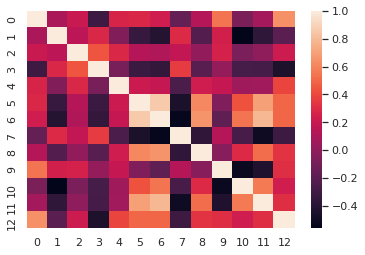

In [ ]:
import seaborn as sns; 
sns.set()
ax = sns.heatmap(corr)

In [ ]:
scaler = StandardScaler()
x_wine = pd.DataFrame(scaler.fit_transform(x_wine))

In [ ]:
y_wine = to_categorical(y_wine)
x_train, x_test, y_train, y_test = train_test_split(x_wine, y_wine, test_size = 0.2)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size = 0.5)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(142, 13)
(18, 13)
(18, 13)
(142, 3)
(18, 3)
(18, 3)


In [ ]:
nn_wine = models.Sequential()
nn_wine.add(layers.Dense(256, activation = 'relu', input_shape = (13, )))
nn_wine.add(layers.Dense(128, activation = 'relu'))
nn_wine.add(layers.Dense(64, activation = 'relu'))
nn_wine.add(layers.Dense(3, activation = 'sigmoid'))
nn_wine.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
wine_hist = nn_wine.fit(x_train, y_train, epochs = 30, validation_data = (x_val, y_val))

Epoch 1/30
5/5 [==============================] - 1s 115ms/step - loss: 1.1025 - accuracy: 0.4437 - val_loss: 1.1005 - val_accuracy: 0.3333
Epoch 2/30
5/5 [==============================] - 0s 5ms/step - loss: 1.0869 - accuracy: 0.5000 - val_loss: 1.0869 - val_accuracy: 0.3889
Epoch 3/30
5/5 [==============================] - 0s 5ms/step - loss: 1.0720 - accuracy: 0.5634 - val_loss: 1.0746 - val_accuracy: 0.5000
Epoch 4/30
5/5 [==============================] - 0s 5ms/step - loss: 1.0576 - accuracy: 0.6338 - val_loss: 1.0630 - val_accuracy: 0.5556
Epoch 5/30
5/5 [==============================] - 0s 5ms/step - loss: 1.0441 - accuracy: 0.7183 - val_loss: 1.0514 - val_accuracy: 0.6111
Epoch 6/30
5/5 [==============================] - 0s 5ms/step - loss: 1.0309 - accuracy: 0.7606 - val_loss: 1.0401 - val_accuracy: 0.6667
Epoch 7/30
5/5 [==============================] - 0s 4ms/step - loss: 1.0182 - accuracy: 0.7887 - val_loss: 1.0296 - val_accuracy: 0.6667
Epoch 8/30
5/5 [================

In [ ]:
val_acc = nn_wine.evaluate(x_val, y_val)[1]
print('The Validation accuracy is', val_acc)

1/1 [==============================] - 0s 1ms/step - loss: 0.7619 - accuracy: 0.9444
The Validation accuracy is 0.9444444179534912


In [ ]:
test_acc = nn_wine.evaluate(x_test, y_test)[1]
print('The test accuracy is', test_acc)

1/1 [==============================] - 0s 2ms/step - loss: 0.7215 - accuracy: 1.0000
The test accuracy is 1.0


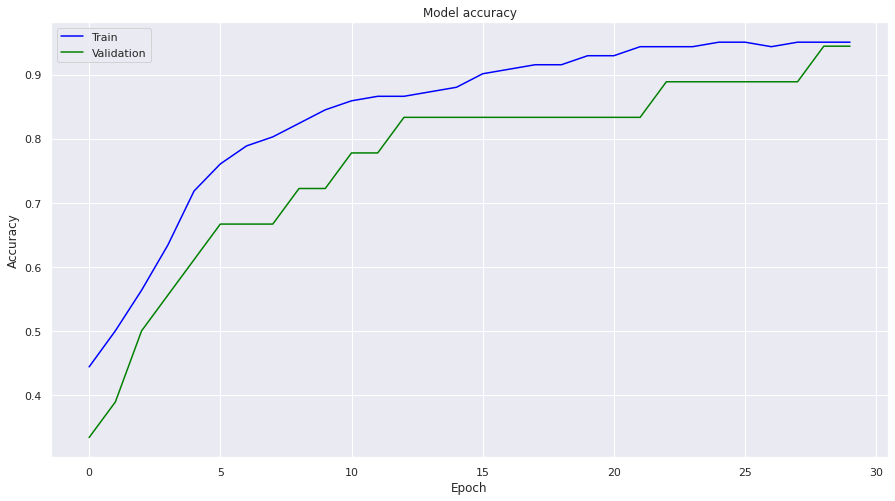

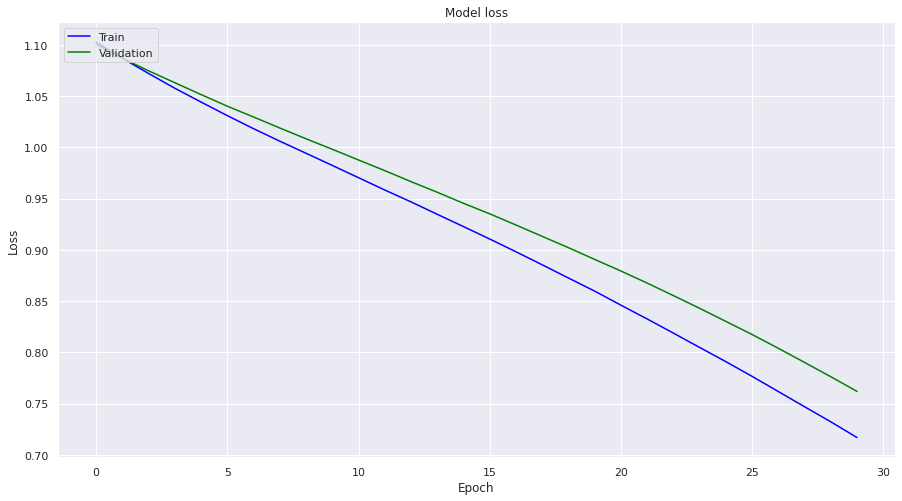

In [ ]:
plt.figure(figsize = (15,8))
plt.plot(wine_hist.history['accuracy'], color = 'blue')
plt.plot(wine_hist.history['val_accuracy'], color = 'green')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize = (15,8))
plt.plot(wine_hist.history['loss'], color = 'blue')
plt.plot(wine_hist.history['val_loss'], color = 'green')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()